#INDICACIONES : Para ejecutar los ejercicios vistos en clases , realizar una copia de este Google Colab o ejecutar las lineas de codigo en un Google Colab o entorno propio.

Para realizar la copia de este Google Colab , vas a la parte superior en "File", se abrirá un desplegable y se seleccionará el boton " Save a copy in Drive". Sobre ese nuevo Google Colab creado, si pueden ejecutar cambios.

Se pide no realizar cambios sobre este link original, solo en su propia copia creada.

In [ ]:
# !pip install library==1.0

In [1]:
%pip install scikit-learn==1.1
#pip install scikit-learn==1.1

# regresion logistica
# regresion lineal
# decision trees (clasification)
# decision regressor (regresion)
# SVM (regression)
# SVC (clasificacion)
# random forest
# XGBoost
# KNN (clasificacion)
# KNR ( regression)
# naive bayes ()

# Kmeans
# PCA


  Using cached scikit-learn-1.1.0.tar.gz (6.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 379, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\re

## Regresión Lineal en Python
Para hacer una regresión lineal en python, vamos a usar scikit-learn, que es una librería de python para aprendizaje automático.

In [ ]:

import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
!pip3 show scikit-learn

Name: scikit-learn
Version: 1.1.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


### Conjunto de Datos
El conjunto de datos de Vivienda de Boston contiene información sobre varias casas en Boston a través de diferentes parámetros.

Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas. Aquí estamos importando este conjunto de datos desde el propio scikit-learn.

Cargando los datos

In [ ]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:

bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Seleccion de caracteristicas (features)
Dado que es realmente difícil de visualizar con las múltiples características, primero predeciremos el precio de la vivienda con solo una variable

Text(0, 0.5, '"House prices in $1000"')

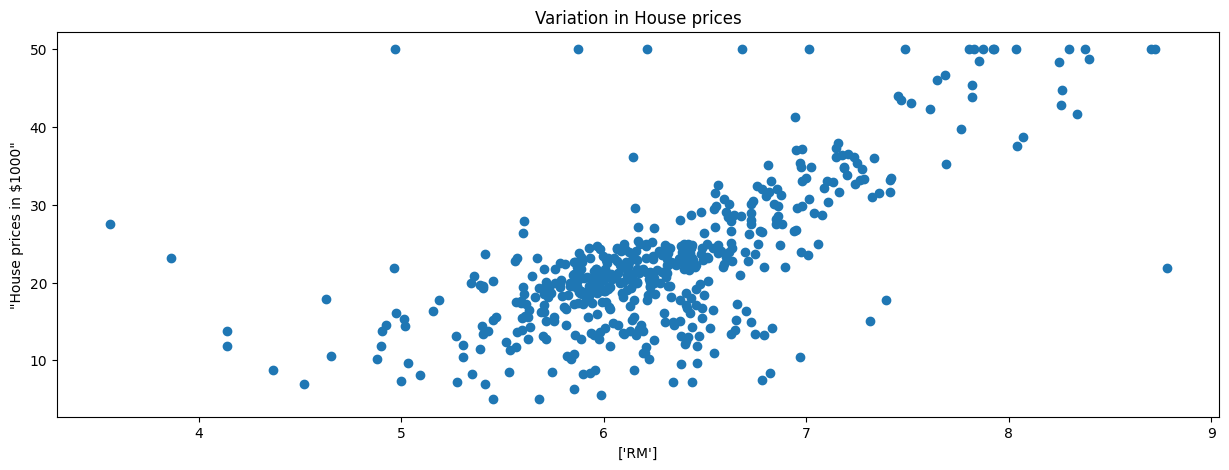

In [ ]:
plt.figure(figsize=(15, 5))

features = ['RM'] ## X
target = bos['PRICE'] ## Y

plt.subplot(1, len(features) , 1)
x = bos[features]
y = target
plt.scatter(x, y, marker='o')
plt.title("Variation in House prices")
plt.xlabel(features)
plt.ylabel('"House prices in $1000"')

In [ ]:
X_rooms = bos.RM  #bos['RM']
y_price = bos.PRICE #bos['PRICE']

print(X_rooms.shape)
print(y_price.shape)

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506,)
(506,)
(506, 1)
(506, 1)


### Dividir los datos en conjuntos de entrenamiento y prueba
Como necesitamos probar nuestro modelo, dividimos los datos en conjuntos de entrenamiento y prueba. Entrenamos el modelo con el 80% de las muestras y probamos con el 20% restante. Hacemos esto para evaluar el rendimiento del modelo en datos no vistos.

Para dividir los datos, usamos la función train_test_split proporcionada por la biblioteca scikit-learn. Finalmente imprimimos las formas de nuestro conjunto de entrenamiento y prueba para verificar si la división se ha producido correctamente.

In [ ]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=2)  ## 80% entrenamiento y 20% para testo

# Entre 0 y 1 --- Porcentaje
# >1 --- Valor tal cual

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


### Entrenamiento y prueba del modelo.
Aquí usamos LinearRegression de scikit-learn para entrenar nuestro modelo tanto en el entrenamiento como en los conjuntos de prueba. y compruebe el rendimiento del modelo en el conjunto de datos del tren.

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

reg_1 = LinearRegression()

## Support Vector Regression
## Decision Regressor
## Random forest


# reg_1 no esta entrenado

reg_1.fit(X_train_1, Y_train_1)  ## Esta funcion hace el entrenamiento


# reg_1 ya esta entrenado



LinearRegression()

El rango de R2 está entre 0 y 1, siendo 1 lo mejor

In [ ]:
# model evaluation for test set

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))  ## Se compara los predichos (ypred) con lo reales (y_test)
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

# RMSE 1 = 0.5
# RMSE 2 = 0.1

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
--------------------------------------
Root Mean Squared Error: 5.536929907868703
R^2: 0.63




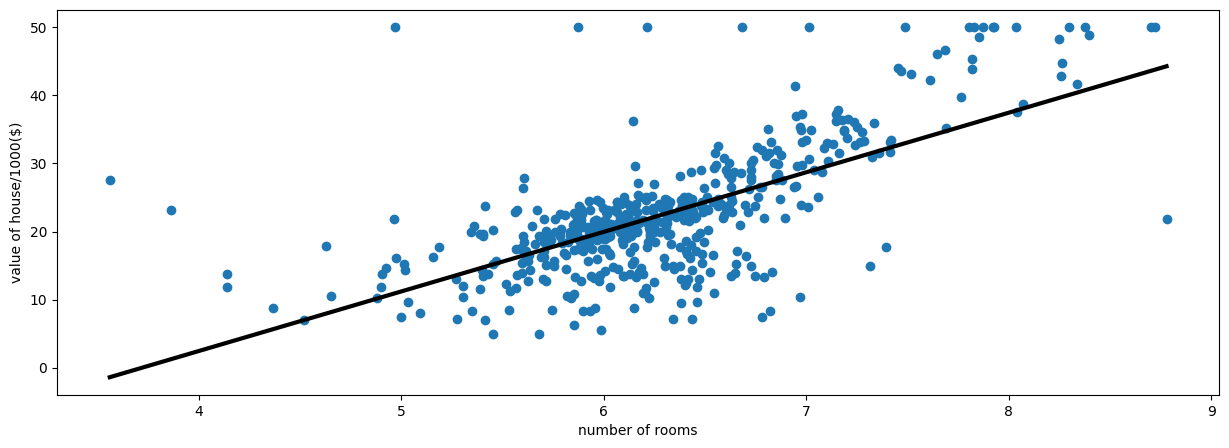

In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) #[0.001,0.002,0.003 .... 8.999, 9.000]
plt.figure(figsize=(15, 5))
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()